# Proyek Analisis Data: E-Commerce Public Dataset
- Nama:Yoga Kusuma Wardhana
- Email: yogawardh@gmail.com
- Id Dicoding: yogawardh

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Metode pembayaran apa yang paling banyak digunakan pada transaksi?
- Pertanyaan 2: Bagaimana distribusi segmentasi pelanggan berdasarkan total pembelian?
- Pertanyaan 3: Kategori produk apa yang paling banyak dan paling sedikit terjual?

## Menyiapkan semua library yang dibutuhkan

In [1]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

## Data Wrangling

### Gathering Data

In [2]:
# Memuat tabel orders

orders_df = pd.read_csv(r"C:\Users\Yoga\Data Analytics\Dicoding\Proyek Tugas Akhir\E-commerce-public-dataset\orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [3]:
# Memuat tabel order_items

order_items_df = pd.read_csv(r"C:\Users\Yoga\Data Analytics\Dicoding\Proyek Tugas Akhir\E-commerce-public-dataset\order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [4]:
# Memuat tabel order_payments

order_payments_df = pd.read_csv(r"C:\Users\Yoga\Data Analytics\Dicoding\Proyek Tugas Akhir\E-commerce-public-dataset\order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [5]:
# Memuat tabel products

products_df = pd.read_csv(r"C:\Users\Yoga\Data Analytics\Dicoding\Proyek Tugas Akhir\E-commerce-public-dataset\products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


#### Data yang akan digunakan:

Dari 2 pertanyaan yang saya buat, kita hanya memerlukan 4 dataframe di atas yaitu **orders_dataset, order_items_dataset, order_payments_dataset, dan products_dataset.** Dikarenakan dari orders_dataset kita sudah bisa menemukan customer_id jadi kita tidak memerlukan customers_dataset untuk mengetahui jumlah customers.

- Untuk menjawab pertanyaan 1 saya memerlukan **order_id dan payment_type** dari **order_payments_dataset.**

- Untuk menjawab pertanyaan 2 saya memerlukan **customer_id dan order_id** dari **orders_dataset** dan **order_id dan payment_value** dari **order_payments_dataset.**

- Untuk menjawab pertanyaan 3 saya memerlukan **order_id dan order_status** dari **orders_dataset**, **order_id dan product_id** dari **order_items_dataset**, serta **product_id dan product_category_name** dari **products_dataset.**

### Assessing Data

#### Orders Table

In [6]:
# Memeriksa orders dataframe

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [7]:
# Memeriksa duplicates

print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


In [8]:
# Memeriksa null values

orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

##### orders table - terdapat missing values

#### Order Items Table

In [9]:
# Memeriksa order_items dataframe

order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [10]:
# Memeriksa duplicates

print("Jumlah duplikasi: ", order_items_df.duplicated().sum())

Jumlah duplikasi:  0


##### order_items table - lengkap

#### Order Payments Table

In [11]:
# Memeriksa order_payments dataframe

order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [12]:
# Memeriksa duplicates

print("Jumlah duplikasi: ", order_payments_df.duplicated().sum())

Jumlah duplikasi:  0


In [13]:
# Memeriksa jumlah tipe pembayaran

print(order_payments_df['payment_type'].nunique())

5


##### order_payments table - lengkap

#### Products Table

In [14]:
# Memeriksa products dataframe

products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [15]:
# Memeriksa duplicates

print("Jumlah duplikasi: ", products_df.duplicated().sum())

Jumlah duplikasi:  0


In [16]:
# Memeriksa null values

products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

##### products table - terdapat missing values

### Cleaning Data

Dikarenakan masalah pada data yang mempengaruhi jawaban dari ketiga pertanyaan bisnis hanya pada products_dataset yang memiliki missing values pada kolom product_category_name, saya akan fokus untuk menangani masalah tersebut.

In [17]:
# Memeriksa missing values pada products table

products_na = products_df[products_df.product_category_name.isna()] # Jika hanya menggunakan kode ini table missing values akan ikut ke dalam streamlit app 

# Menampilkan hanya dataframe yang memiliki miising values

print(products_na)

                             product_id product_category_name  \
105    a41e356c76fab66334f36de622ecbd3a                   NaN   
128    d8dee61c2034d6d075997acef1870e9b                   NaN   
145    56139431d72cd51f19eb9f7dae4d1617                   NaN   
154    46b48281eb6d663ced748f324108c733                   NaN   
197    5fb61f482620cb672f5e586bb132eae9                   NaN   
...                                 ...                   ...   
32515  b0a0c5dd78e644373b199380612c350a                   NaN   
32589  10dbe0fbaa2c505123c17fdc34a63c56                   NaN   
32616  bd2ada37b58ae94cc838b9c0569fecd8                   NaN   
32772  fa51e914046aab32764c41356b9d4ea4                   NaN   
32852  c4ceee876c82b8328e9c293fa0e1989b                   NaN   

       product_name_lenght  product_description_lenght  product_photos_qty  \
105                    NaN                         NaN                 NaN   
128                    NaN                         NaN         

In [18]:
# Menghitung persentase missing values dari total data product_category_name 

na_count = products_df['product_category_name'].isna().sum()
na_percentage = na_count / len(products_df['product_category_name']) * 100
print(na_percentage)

1.8512336499650999


Dari hasil pemeriksaan diatas, kolom-kolom yang mendeskripsikan kategori produk juga memiliki missing values (product_name_lenght, product_description_lenght, product_photos_qty) maka dari itu nama kategori produk sangat sulit untuk diprediksi. Persentase dari missing values yang ada juga kurang dari 2%, maka saya memutuskan untuk menghapus data yang mengandung missing values agar tidak membuat bias dan memperumit hasil pengolahan data.

In [19]:
# Menghapus data yang mengandung missing values

products_df = products_df.dropna(subset=['product_category_name'])
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32341 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32341 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32340 non-null  float64
 6   product_length_cm           32340 non-null  float64
 7   product_height_cm           32340 non-null  float64
 8   product_width_cm            32340 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


Setelah menghapus missing values dari kolom product_category_name maka data sudah bisa digunakan untuk mencari jawaban dari pertanyaan nomor 3.

## Exploratory Data Analysis (EDA)

### 1. Explore order_payments_df

In [20]:
# Menghitung frekuensi munculnya tiap tipe pembayaran

payment_counts = order_payments_df['payment_type'].value_counts()
print(payment_counts)

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64


In [21]:
# Mencari tipe pembayaran terbanyak

most_used_payment = payment_counts.idxmax()

# Menghitung total penggunaan

total_used = payment_counts.max()

# Tampilkan hasil

print("Metode pembayaran paling banyak digunakan adalah:", most_used_payment, "dengan jumlah penggunaan", total_used, "kali")

Metode pembayaran paling banyak digunakan adalah: credit_card dengan jumlah penggunaan 76795 kali


### 2. Explore orders_df & order_payments_df

In [22]:
# Menggabungkan dataset orders dan order_payments

merged_payments_df = pd.merge(orders_df, order_payments_df, on=['order_id'], how='inner')
merged_payments_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,credit_card,3,179.12


In [23]:
# Mengetahui total uang yang dibelanjakan oleh setiap pelanggan

monetary_df = merged_payments_df.groupby('customer_id')['payment_value'].sum().reset_index()

# Menampilkan total uang yang dibelanjakan oleh pelanggan

print(monetary_df)

                            customer_id  payment_value
0      00012a2ce6f8dcda20d059ce98491703         114.74
1      000161a058600d5901f007fab4c27140          67.41
2      0001fd6190edaaf884bcaf3d49edf079         195.42
3      0002414f95344307404f0ace7a26f1d5         179.35
4      000379cdec625522490c315e70c7a9fb         107.01
...                                 ...            ...
99435  fffecc9f79fd8c764f843e9951b11341          81.36
99436  fffeda5b6d849fbd39689bb92087f431          63.13
99437  ffff42319e9b2d713724ae527742af25         214.13
99438  ffffa3172527f765de70084a7e53aae8          45.50
99439  ffffe8b65bbe3087b653a978c870db99          18.37

[99440 rows x 2 columns]


In [24]:
# Menghitung rata-rata uang yang dibelanjakan oleh pelanggan pada satu kali transaksi

avg_payment_per_order = merged_payments_df.groupby(['customer_id', 'order_id'])['payment_value'].sum().mean()

# Menampilkan rata-rata uang yang dibelanjakan oleh pelanggan pada satu kali transaksi

print(avg_payment_per_order)

160.9902666934835


In [25]:
# Membuat fungsi untuk menentukan segmentasi pelanggan

def customer_segment(payment):
    if payment < 40:
        return 'bronze'
    elif payment >= 40 and payment < 80:
        return 'silver'
    elif payment >= 80 and payment < 160:
        return 'gold'
    else:
        return 'diamond'

# Menambahkan kolom segmen ke dalam DataFrame

monetary_df['segment'] = monetary_df['payment_value'].apply(customer_segment)

# Menampilkan total belanja pelanggan beserta segmentasinya

print(monetary_df)

                            customer_id  payment_value  segment
0      00012a2ce6f8dcda20d059ce98491703         114.74     gold
1      000161a058600d5901f007fab4c27140          67.41   silver
2      0001fd6190edaaf884bcaf3d49edf079         195.42  diamond
3      0002414f95344307404f0ace7a26f1d5         179.35  diamond
4      000379cdec625522490c315e70c7a9fb         107.01     gold
...                                 ...            ...      ...
99435  fffecc9f79fd8c764f843e9951b11341          81.36     gold
99436  fffeda5b6d849fbd39689bb92087f431          63.13   silver
99437  ffff42319e9b2d713724ae527742af25         214.13  diamond
99438  ffffa3172527f765de70084a7e53aae8          45.50   silver
99439  ffffe8b65bbe3087b653a978c870db99          18.37   bronze

[99440 rows x 3 columns]


In [26]:
# Menampilkan tabel total belanja pelanggan beserta segmentasinya

monetary_df.head()

,customer_id,payment_value,segment
0,00012a2ce6f8dcda20d059ce98491703,114.74,gold
1,000161a058600d5901f007fab4c27140,67.41,silver
2,0001fd6190edaaf884bcaf3d49edf079,195.42,diamond
3,0002414f95344307404f0ace7a26f1d5,179.35,diamond
4,000379cdec625522490c315e70c7a9fb,107.01,gold


### 3. Explore orders_df, order_items_df, order_payments_df, & products_df

In [27]:
# Memeriksa jumlah kategori

total_category = products_df['product_category_name'].nunique()
print("Jumlah kategori:", total_category)

Jumlah kategori: 73


In [28]:
# Menggabungkan data dari ketiga dataset

merged_df = pd.merge(orders_df, order_items_df, on='order_id')
merged_all = pd.merge(merged_df, products_df, on='product_id')

# Filter hanya pesanan dengan order_status "delivered"

delivered_df = merged_all[merged_all['order_status'] == 'delivered']

# Menghitung jumlah produk yang terjual per kategori produk

product_category_sales = delivered_df['product_category_name'].value_counts().reset_index()
product_category_sales.columns = ['product_category_name', 'qty_sold']

# Menampilkan jumlaah produk yang terjual per kategori produk

product_category_sales.head(10)

,product_category_name,qty_sold
0,cama_mesa_banho,10953
1,beleza_saude,9465
2,esporte_lazer,8431
3,moveis_decoracao,8160
4,informatica_acessorios,7644
5,utilidades_domesticas,6795
6,relogios_presentes,5859
7,telefonia,4430
8,ferramentas_jardim,4268
9,automotivo,4140


In [29]:
# Menampilkan jumlaah produk yang terjual per kategori produk dengan penjualan paling sedikit

product_category_sales.tail(10)

,product_category_name,qty_sold
63,flores,33
64,casa_conforto_2,30
65,fashion_esporte,29
66,artes_e_artesanato,24
67,cds_dvds_musicais,14
68,la_cuisine,14
69,portateis_cozinha_e_preparadores_de_alimentos,14
70,pc_gamer,8
71,fashion_roupa_infanto_juvenil,7
72,seguros_e_servicos,2


In [30]:
# Mencari kategori dengan penjualan paling banyak

most_sold = product_category_sales.loc[product_category_sales['qty_sold'].idxmax()]

# Mencari kategori dengan penjualan paling sedikit

least_sold = product_category_sales.loc[product_category_sales['qty_sold'].idxmin()]

# Menampilkan kategori dengan penjualan paling banyak

print("Kategori produk yang paling banyak terjual adalah:", most_sold['product_category_name'])

# Menampilkan kategori dengan penjualan paling sedikit

print("Kategori produk yang paling sedikit terjual adalah:", least_sold['product_category_name'])

Kategori produk yang paling banyak terjual adalah: cama_mesa_banho
Kategori produk yang paling sedikit terjual adalah: seguros_e_servicos


## Visualization & Explanatory Analysis

### Pertanyaan 1: 

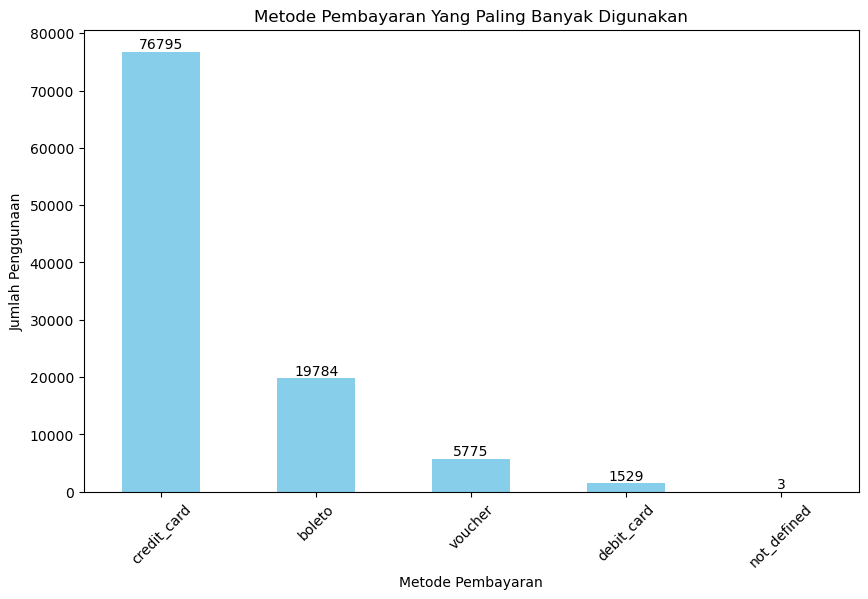

In [31]:
# Visualisasi Metode Pembayaaran

plt.figure(figsize=(10, 6))
payment_counts.plot(kind='bar', color='skyblue')
plt.title('Metode Pembayaran Yang Paling Banyak Digunakan')
plt.xlabel('Metode Pembayaran')
plt.ylabel('Jumlah Penggunaan')
plt.xticks(rotation=45)

# Menambahkan angka di atas setiap batang

for i, v in enumerate(payment_counts):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Menampilkan grafik

plt.show()

#### Explanatory Analysis: 

Berdasarkan hasil analisis, metode pembayaran yang paling banyak digunakan adalah kartu kredit dengan jumlah penggunaan 76.795 kali. Metode pembayaran lainnya yang juga cukup populer adalah boleto dengan jumlah penggunaan 19.784 kali dan voucher dengan jumlah penggunaan 5.775 kali.

Grafik di atas menunjukkan bahwa metode pembayaran kartu kredit mendominasi transaksi penjualan. Hal ini menunjukkan bahwa konsumen lebih memilih untuk menggunakan kartu kredit untuk melakukan pembayaran dari padaa metode yang lainnya.

### Pertanyaan 2: 

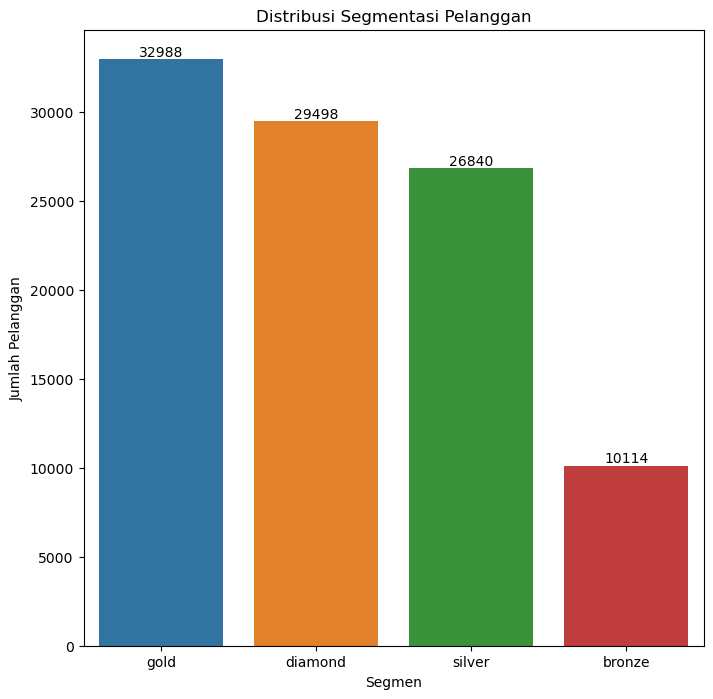

In [32]:
# Visualisasi segmentasi pelanggan

segment_counts = monetary_df['segment'].value_counts()
plt.figure(figsize=(8, 8))
sns.countplot(data=monetary_df, x='segment', order=segment_counts.index)
plt.xlabel("Segmen")
plt.ylabel("Jumlah Pelanggan")
plt.title("Distribusi Segmentasi Pelanggan")

# Menambahkan angka penjualan pada tiap batang

for i, v in enumerate(segment_counts):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Menampilkan grafik

plt.show()

#### Explanatory Analysis: 

Berdasarkan hasil analisis, segmentasi pelanggan dibagi menjadi 4 segmen yaitu bronze, silver, gold, dan diamond. Grafik di atas menunjukkan bahwa pelanggan paling banyak adalah pelanggan dengan segmentasi gold (menghabiskan 80-160 dalam satu kali transaksi) dengan jumlah transaksi 32.988 kali, disusul oleh segmen diamond (menghabiskan lebih dari 160 dalam satu kali transaksi) dengan jumlah transaksi 29.498. Segmen bronze (menghabiskan dibawah 40 dalam satu kali transaksi) dengan jumlah transaksi sebesar 10.114 kali.

### Pertanyaan 3: 

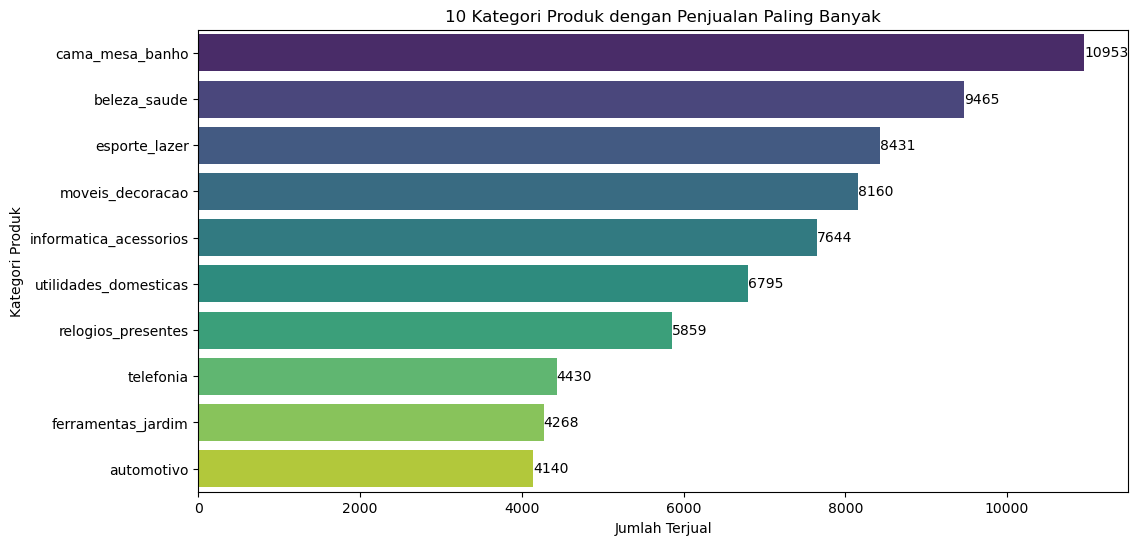

In [33]:
# Membuat grafik batang dengan Seaborn untuk 10 kategori dengan penjualan paling banyak

plt.figure(figsize=(12, 6))
sns.barplot(x='qty_sold', y='product_category_name', data=product_category_sales.head(10), palette='viridis')
plt.xlabel('Jumlah Terjual')
plt.ylabel('Kategori Produk')
plt.title('10 Kategori Produk dengan Penjualan Paling Banyak')

# Menambahkan angka penjualan pada tiap batang

for i, qty in enumerate(product_category_sales['qty_sold'].head(10)):
    plt.text(qty, i, f'{qty}', va='center')

# Menampilkan grafik

plt.show()

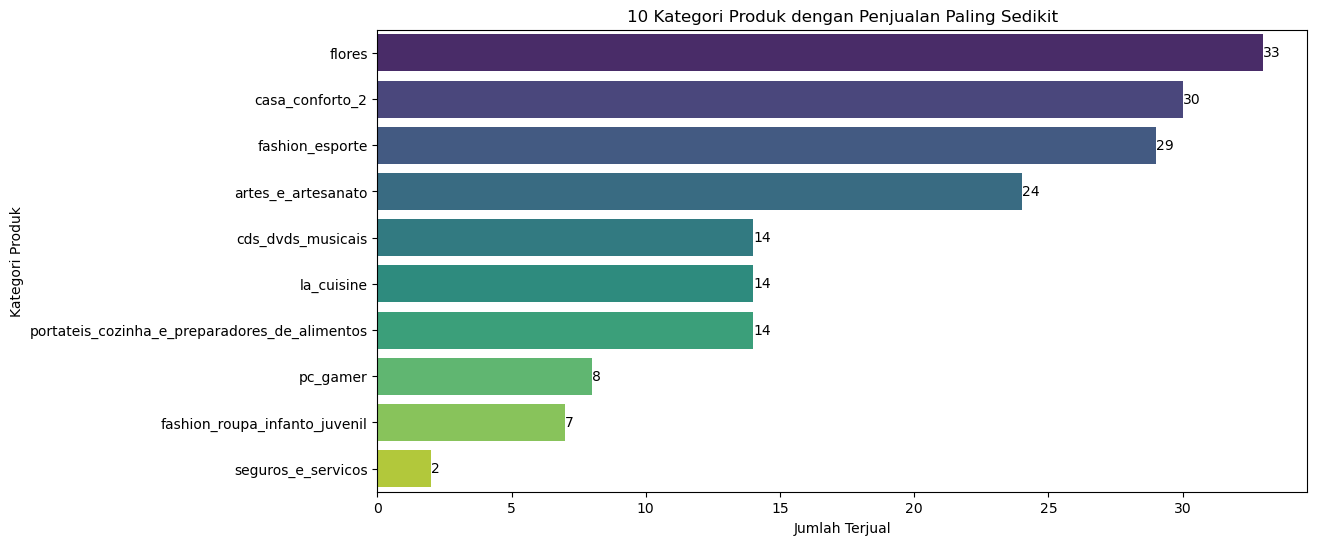

In [34]:
# Membuat grafik batang dengan Seaborn untuk 10 kategori dengan penjualan paling sedikit

plt.figure(figsize=(12, 6))
sns.barplot(x='qty_sold', y='product_category_name', data=product_category_sales.tail(10), palette='viridis')
plt.xlabel('Jumlah Terjual')
plt.ylabel('Kategori Produk')
plt.title('10 Kategori Produk dengan Penjualan Paling Sedikit')

# Menambahkan angka penjualan pada tiap batang

for i, qty in enumerate(product_category_sales['qty_sold'].tail(10)):
    plt.text(qty, i, f'{qty}', va='center')

# Menampilkan grafik

plt.show()

#### Explanatory Analysis: 

Pada 2 grafik diatas terlihat bahwa kategori produk yang paling banyak terjual adalah cama_mesa_banho dengan jumlah pembelian sebanyak 10953 kali, sedangkan yang palik sedikit adalah seguros_e_servicos dengan hanya 2 kali penjualan. 5 kategori teratas ditempati oleh kategori-kategori seperti cama mesa banho, beleza saude, esporte lazer, moveiz decoracao, informatica acessorios (bed bath table, beauty health, sport leisure, furniture decoration, IT accessories) yang berhubungan dengan produk gaya hidup dan dekorasi.

## Conclusion

##### Kesimpulan Pertanyaan 1:

Dari hasil EDA pada **order_payments_df** diketahui bahwa tipe pembayaran yang paling banyak digunakan untuk pembelian di E-Commerce adalah **credit_card** (kartu kredit).

Beberapa hal yang bisa dilakukan dengan perusahaaan dengan data ini adalah:
- **Memberikan promosi Khusus:** Perusahaan dapat membuat promosi atau insentif khusus untuk pengguna kartu kredit. Ini bisa mencakup penawaran diskon khusus, cashback, atau hadiah untuk pengguna kartu kredit. 
- **Meningkatkan keamanan:** Karena kartu kredit adalah metode pembayaran yang populer, perusahaan perlu memastikan bahwa sistem pembayaran mereka aman.
- **Optimisasi proses pembayaran:** Dengan mengetahui bahwa kartu kredit adalah metode pembayaran yang paling sering digunakan, perusahaan dapat memperbaiki dan mengoptimalkan proses pembayaran dengan kartu kredit.

##### Kesimpulan Pertanyaan 2:

Dari hasil EDA pada **orders_df dan order_payments_df** diketahui jumlah uang yang dihabiskan tiap pelanggan dan rata-rata uang yang dihabiskan pada satu kali transaksi yaitu sebesar **160** (dibulatkan ke bawah). Diketahui pula bahwa jumlah pelanggan yang paling banyak adalah pelanggan dengan segmen **gold** dengan jumlah pelanggan sebanyak **32988** orang.

Beberapa hal yang bisa dilakukan dengan perusahaaan dengan data ini adalah:

- **Memahami perilaku pelanggan:** Dengan mengetahui total uang yang dibelanjakan oleh setiap pelanggan dan rata-rata uang yang dibelanjakan oleh pelanggan pada satu kali transaksi, perusahaan dapat memahami perilaku pelanggan mereka. Perusahaan dapat menggunakan informasi ini untuk membuat keputusan tentang strategi pemasaran dan penjualan mereka, seperti memberikan voucher khusus untuk pembelian dengan nominal diatas 160.
- **Menentukan pelanggan VIP:** Perusahaan dapat menggunakan data ini untuk menentukan pelanggan VIP mereka. Pelanggan VIP adalah pelanggan yang melakukaan transaksi dengan nominal lebih dari 160. Perusahaan dapat memberikan layanan khusus kepada pelanggan VIP ini untuk meningkatkan kepuasan mereka dan mendorong mereka untuk terus berbelanja.

##### Kesimpulan Pertanyaan 3:

Dari hasil EDA untuk pertanyaan nomer 3 kategori dengan penjualan paling banyak adalah **cama_mesa_banho** (bed table bath) dengan total penjualan **10953** kali dan kategori produk dengan penjualan paling sedikit adalah **seguros_e_servicos** (insurance and services)  dengan hanya **2** penjualan.

Beberapa hal yang bisa dilakukan dengan perusahaaan dengan data ini adalah:

- **Mengetahui kategori yang paling diminati:** Dengan data ini perusahaan dapat mengetahui kategori produk mana yang paling diminati oleh pelanggan (kategori produk terbanyak) dan kategori produk mana yang perlu diperhatikan atau mungkin ditingkatkan penjualannya (kategori produk terendah). 
- **Membuat keputusan strategis:** Ini dapat membantu perusahaan dalam pengambilan keputusan strategis terkait stok, pemasaran, dan pengembangan produk. Selain itu, analisis semacam ini juga dapat digunakan untuk mengidentifikasi tren dan peluang bisnis baru.